In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/kaggle_titanic_train.csv')
test = pd.read_csv('./data/kaggle_titanic_test.csv')
sub = pd.read_csv('./data/kaggle_titanic_gender_submission.csv')

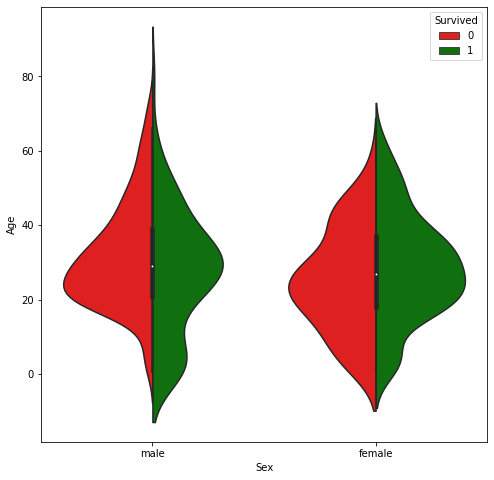

In [4]:
fig = plt.figure(figsize=(8, 8))
sns.violinplot(x='Sex', y='Age',
               hue='Survived',
               data=train,
               split=True,    # 사망 생존을 하나로 만든다.
               palette={0: "r", 1: "g"})


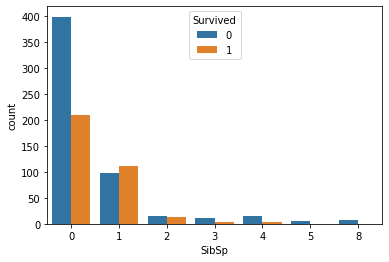

In [5]:
# 배우자 또는 형제가 적을수록 생존할 가능성이 높아질까?
# SibSp, Survived, data

sns.countplot(x="SibSp", hue="Survived", data=train)

In [6]:
train.groupby("Pclass").mean()
# Pclass로 묶고, Age 평균을 그래프 (1)
# Pclass, Survived 로 묶고 Age 평균을 그리기(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


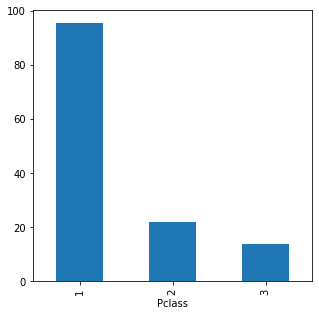

In [7]:
ax = plt.subplot()
tr_a = train[train['Survived']==1]
a = tr_a.groupby(["Pclass"]).mean()['Fare']
a.plot(kind='bar', figsize=(5,5), ax=ax)

In [8]:
train['Age'] = train['Age'].fillna(-0.5)  # 중앙값으로 결측값 채우기
test['Age'] = test['Age'].fillna(-0.5)  # 중앙값으로 결측값 채우기

In [9]:
import numpy as np
bins = [  -1,      0,         5,        12,            18,         24,           35,          60,    np.inf]  # 나이대 구분
labels = [  'Unknown', 'Baby',   'Child',   'Teenager',   'Student', 'Young Adult', 'Adult',   'Senior']

In [10]:
# Cabin 이 공백이냐 아니냐.
train['CabinBool'] = (train['Cabin'].notnull().astype("int"))
test['CabinBool'] = (test['Cabin'].notnull().astype("int"))

In [11]:
# Cabin이 빼고 시작하겠다.
# 6-4 Cabin 열 제외하고 train, test만들어주기
# 6-5 Ticket 열 제외 train,test만들어주기
# 6-6 Embarked의 S,C, Q의 개수는 얼마인지 확인하기

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

print( train['Sex'].value_counts() )
print( train['Embarked'].value_counts() )

train = train.fillna({"Embarked": "S"})
print( train['Embarked'].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
### 이름(Name) 
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col', 'Don', 
                                              'Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Countess','Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [15]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

print(mr_age)
print(miss_age)
print(mrs_age)
print(master_age)
print(royal_age)
print(rare_age)
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

KeyError: 'AgeGroup'